In [1]:
rootf = './'

In [2]:
%pylab inline
%load_ext autoreload
%autoreload 2
# #---------------------------------
import sys
sys.path.append('./functions') 
from save_load import *
from functions_NO_MEA import*

Populating the interactive namespace from numpy and matplotlib


# Load Data

In [3]:
time = np.linspace(0,32,321)[:-1]
SHIFT_BADEN=False

Fsave = rootf + 'data/MEA_Data/pckls_ID/'

LABELS = {}
PSTH_Z = {}
G_LABELS = {}

for G in np.arange(32):
    fsave = Fsave + 'clustermodel'+str(G)
    try:
        model, psth_z = load_obj(fsave)
    

        labels = model.labels_
        
        G_LABELS[G] = np.sort(np.unique(labels))
        
        # Transform to BADEN times (stitch first 2 seconds in the end)
        if SHIFT_BADEN==False:
            i=0
            for p in psth_z:
                psth_z[i]=np.append(psth_z[i][20:],psth_z[i][0:20])
                i+=1
       
        LABELS[G] =labels
        PSTH_Z[G] = np.copy(psth_z)
    
    except:
        print('no data group ',G)
        
# Adding subgroup to Group 8    
PSTH_Z[8] = np.append(PSTH_Z[8],PSTH_Z[31][LABELS[31]==3,:],axis=0)
LABELS[8] = np.append(LABELS[8],LABELS[31][LABELS[31]==3]-2)
G_LABELS[8] =np.array([0,1])

print('Groups 18 and 26 have 1 cell each')

no data group  18
no data group  26
no data group  27
no data group  29
Groups 18 and 26 have 1 cell each


/Users/matias/anaconda/lib/python3.6/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator AgglomerativeClustering from version 1.3.0 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [4]:
Fsave = rootf + 'data/MEA_Data/pckls_ID/'

fsave = Fsave +  'group32_celldataID'
cell_data = load_obj(fsave)

SELECTED_CELLS = {}

for G in list(G_LABELS.keys()):
    fsave = Fsave + 'selected_cells' + str(G)
    selected_cells = load_obj(fsave)
    
    SELECTED_CELLS[G] = selected_cells
    
# add for group 8

N=len(SELECTED_CELLS[8])
for i in np.arange(sum(LABELS[31]==3)):
    SELECTED_CELLS[8].update({N+i: SELECTED_CELLS[31][np.where(LABELS[31]==3)[0][i]]})

In [5]:
# My list of group cells

GROUPS = G_LABELS

CLUSTERS = [
    [1],              #0
    [0,1,2],
    [0,1,3,4],
    [0,1,2],
    [0,1],           
    [0],              #5
    [0],
    [0,1,2],
    [0,1],
    [0,1,2],
    [0,1],            #10
    [0],
    [0],
    [0,1],
    [0],
    [0],              #15
    [0] ,
    [0] ,
    []   ,               #18 one cell
    [0],
    [0,1,2,3],               #20
    [0] ,
    [0],
    [0],
    [0,1],
    [0,1],            #25
    [],                   #26 one cell
    [] ,                  #27  NO CELLS
    [0],
    [],                   #29  NO CELLS
    [0],                 #30
    [0,7,5,6,9,11, 1,12]  # 4 was missing
]

BAD_CELLS = [
    [65,53] ,               #0
    [2,80,6  ,18,21, 61,72,78,82,6 ],
    [10,69,     9,   48,54,91,93],
    [3,5,50,59,80,87],
    [40,58,69,   ]  ,       
    [52,     19,46,100],    #5
    [],
    [62,96],
    [92,81,52,22,4, 49, 140, ],
    [72,68],
    [],                    #10
    [],
    [31],
    [32,88,93],
    [6,35],
    [],                 #15          
    [],
    [89],
    [],                       #18 one cell
    [],                 
    [36,29,52,144],                 # 20
    [5],
    [18,20],              
    [],
    [100],
    [],               #25
    [],                    #26 one cell
    [],                   #27  NO CELLS
    [48],
    [],                       #29  NO CELLS
    [105,19] ,           #30
    [66]                        
]


SubGroups32 = [[0,7],[5,6,9,11],[1,12]]    # 


NEW_LABELS = {}
for G in G_LABELS.keys():
    Groups = []
    for gg in GROUPS[G]:   
        Groups.append([gg])
        
    for G in list(G_LABELS.keys()):

        new_labels = np.zeros(len(LABELS[G]))

        for g,groups in enumerate(Groups):
            for n in groups:
                clustersin = [np.where((LABELS[G]==n))[0]][0]
                for j in clustersin:
                    new_labels[j]=g

        NEW_LABELS[G] = new_labels

# Calculating STAs data and plotting

In [6]:
def getwidth(curve):
    
    m = np.min(curve)
    M=  np.max(curve)
    if M>-m: 
        m=-M
        curve=-curve
        
    p = np.where(curve==m)[0][0]
    
    if curve[p]>0: curve=-curve
        
    for x in np.arange(p+1,40):
        if curve[x]>m/2:      
            y0 = m/2-curve[x-1]
            y1 = curve[x]-curve[x-1]
            p2= y0/y1+x-1
#             print(x,p2)
            break
    for x in np.arange(p-1,0,-1):
        if curve[x]>m/2:

            y0 = m/2-curve[x+1]
            y1 = curve[x]-curve[x+1]
            p1= -y0/y1+x+1
#             print(p1)
            break     
    try:
        width = (p2-p1)/30
    except:
        width=-1
        plot(curve)
#     figure()
#     plot(curve)
#     axvline(p)
#     axvline(p2)
#     axvline(p1)
#     axhline(0)
#     axhline(m/2)
#     plot(curve)
    return width,(40-p)/30

In [9]:
G=31  # Type 32 is G=31

if G==31:
    bad_cells_STA = [458,648,894, 518,640,1238,1281,205,859,1153,776,1012] #STAs could not be retreived or fitted 
else:
    bad_cells_STA = []

COLORS = ['k','g','b']
xmin = 18
xmax=32
#-------------
Listing = {}
Listing[0] = []
Listing[1] = []
Listing[2] = []

esizec1 = []
esizeno = []
esizewo = []
Esizec1 = {}
Esizeno = {}
Esizewo = {}
wc1 = []
wno = []
wwo = []
Wc1 = {}
Wno = {}
Wwo = {}
curvesc1 = []
curvesno = []
curveswo = []
Curvesc1={}
Curvesno={}
Curveswo={}
for g in [0,1,2]:
    Wc1[g]=[]
    Wno[g]=[]
    Wwo[g]=[]
    Curvesc1[g] = []
    Curvesno[g] = []
    Curveswo[g] = []
    Esizec1[g] = []
    Esizeno[g] = []
    Esizewo[g] = []

from matplotlib import gridspec
PDF_folder = rootf + 'OUTPUT_NO_MEA/STAs_movement/'

Temp='' # to save in 'temp' folder

PLOT=False

cmap='RdBu_r'
# interpolation='gaussian'
# interpolation='bicubic'
interpolation='none'
exp_treat=1

text_title = ['first','NO','wash_out']

for icluster2 in CLUSTERS[G][0:]:
    idx_cluster = np.where(NEW_LABELS[G]==icluster2)[0]
    print(icluster2,idx_cluster,len(idx_cluster))
    scount=0
    for s in SubGroups32:
        if icluster2 in s: Group = scount
        scount+=1
    for index in sorted(idx_cluster):

        cell_nb = index  

        exp,cell_idx, cell_name = SELECTED_CELLS[G][cell_nb]
#         print(exp,cell_idx, cell_name, cell_nb)
        if cell_name in bad_cells_STA and not (cell_name==776 and exp==7):continue
            
        cell_nb = cell_idx 

        Listing[Group].append([exp,cell_idx, cell_name])
#         print('Listing',Group,exp,cell_idx, cell_name)
        #----------------------------------------------------------
        # PLOT
        if PLOT:
            gs = gridspec.GridSpec(3,2,hspace=0.35)

            fig=figure(figsize=(10,14))
            fig.suptitle('Group'+str(Group)+'_exp'+str(exp)+'   cluster '+str([cell_nb]),size=20)
        for COL in [0,1,2]:
            if PLOT:
                ax= subplot(gs[COL:COL+1,0:1])
                ax = plt.gca()
                ax.set_aspect('equal', adjustable='box')
            if COL==0: 
                tdata = cell_data[exp][cell_nb]["temporal_sta_c1"]
                sdata = cell_data[exp][cell_nb]["spatial_sta_c1"]
                Ex=cell_data[exp][cell_nb]['ellipseMat_c1'][0]
                Ey=cell_data[exp][cell_nb]['ellipseMat_c1'][1]
                mx=np.mean(Ex)
                my=np.mean(Ey)
                esizec1.append(cell_data[exp][cell_nb]["ellipseSize_c1"])
                Esizec1[Group].append(cell_data[exp][cell_nb]["ellipseSize_c1"])
                w,p=getwidth(cell_data[exp][cell_nb]["temporal_sta_c1"])
                wc1.append(w)
                Wc1[Group].append(w)
                curvesc1.append(cell_data[exp][cell_nb]["temporal_sta_c1"])
                Curvesc1[Group].append(cell_data[exp][cell_nb]["temporal_sta_c1"])

            if COL==1: 
                tdata = cell_data[exp][cell_nb]["temporal_sta_no"]
                sdata = cell_data[exp][cell_nb]["spatial_sta_no"]
                Ex=cell_data[exp][cell_nb]['ellipseMat_no'][0]
                Ey=cell_data[exp][cell_nb]['ellipseMat_no'][1]
                mx=np.mean(Ex)
                my=np.mean(Ey)
                esizeno.append(cell_data[exp][cell_nb]["ellipseSize_no"])
                Esizeno[Group].append(cell_data[exp][cell_nb]["ellipseSize_no"])
                w,p=getwidth(cell_data[exp][cell_nb]["temporal_sta_no"])
                wno.append(w)
                Wno[Group].append(w)
                curvesno.append(cell_data[exp][cell_nb]["temporal_sta_no"])
                Curvesno[Group].append(cell_data[exp][cell_nb]["temporal_sta_no"])
                
            if COL==2: 
                tdata = cell_data[exp][cell_nb]["temporal_sta_wo"]
                sdata = cell_data[exp][cell_nb]["spatial_sta_wo"]
                Ex=cell_data[exp][cell_nb]['ellipseMat_wo'][0]
                Ey=cell_data[exp][cell_nb]['ellipseMat_wo'][1]
                mx=np.mean(Ex)
                my=np.mean(Ey)
                esizewo.append(cell_data[exp][cell_nb]["ellipseSize_wo"])
                Esizewo[Group].append(cell_data[exp][cell_nb]["ellipseSize_wo"])
                w,p=getwidth(cell_data[exp][cell_nb]["temporal_sta_wo"])
                wwo.append(w)
                Wwo[Group].append(w)
                curveswo.append(cell_data[exp][cell_nb]["temporal_sta_wo"])
                Curveswo[Group].append(cell_data[exp][cell_nb]["temporal_sta_wo"])

            if PLOT:
                ax.step(np.linspace(-40/30,0,40),tdata,COLORS[COL],lw=3)
                ax.axhline(0,color='k',lw=0.5)
                ax.set_ylim([-0.8,0.8])
                ax.set_xlabel('Time(s)')


                ax.set_title('  '+text_title[COL],size=14)

                ax= subplot(gs[COL:COL+1,1:2])
                sta = np.sign(sdata) * np.exp(np.log(abs(sdata)*exp_treat))
    #             sta = np.sign(sdata) * np.exp(np.log(abs(sdata)*exp_treat))
                vmax=np.amax(abs(sta))*1.
                ax.imshow(sta,vmin=-vmax,vmax=vmax,cmap=cmap,interpolation=interpolation)
                ax.set_xlim(xmin,xmax)
                ax.set_ylim(xmax,xmin)

                # plot Ellipse

                #-----------------
                Ex = (Ex-mx)*2+mx
                Ey = (Ey-my)*2+my
                
                
                ax.plot(Ex,Ey,COLORS[COL],lw=2 ,alpha=0.5)#,lw=10)    #rotated ellipse
                ax.plot()

                if COL>0:
                    ax= subplot(gs[0:0+1,1:2])
                    ax.plot(Ex,Ey,COLORS[COL],lw=2 ,alpha=0.5)#,lw=10)    #rotated ellipse

                    ax= subplot(gs[0:0+1,0:1])
                    ax.step(np.linspace(-40/30,0,40),tdata,COLORS[COL],lw=3)

        if PLOT:
            codename =  'Group'+str(Group)+'_exp'+str(exp)+'_c'+str(cell_name)
            fsave = PDF_folder + Temp +'/' +codename +'_STA'  

            fig.savefig(fsave+'.png',format='png',dpi=90)
#             fig.savefig(fsave+'.pdf',format='pdf')
            close(fig)
#             print(fsave)
    #--------------
print('Done!')
len(wc1)

0 [25 26 27 45 48 50 51 52 53] 9
7 [ 1  6 12 14 16 17 20 21] 8
5 [5 9] 2
6 [15 18 19] 3
9 [ 2 11] 2
11 [0 3 7] 3
1 [ 4 10 13 23 38 49] 6
12 [22 24 30 35 36 41 42 46 47] 9
Done!


30

# Curves

/Users/matias/anaconda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


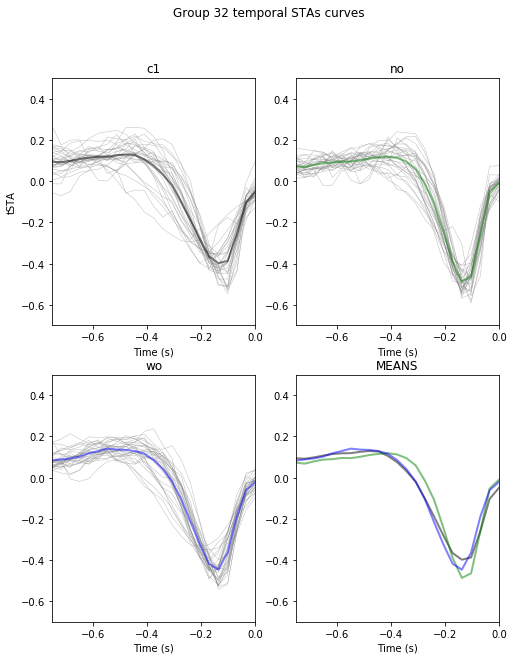

In [29]:
# Plot Curves data
tsta = np.linspace(-40/30,0,40)
PDFsave= rootf+ '/OUTPUT_NO_MEA/STA_analysis/'
fsave = PDFsave + 'Group'+str(G+1)+'_tSTAs_curves'

tstas= [curvesc1,curvesno,curveswo]
COLORS = ['k','g','b']
TITLES = ['c1','no','wo', 'MEANS']
fig =figure(figsize=(8,10))
fig.suptitle('Group '+str(G+1)+' temporal STAs curves')
for i in [0,1,2]:
    ax= fig.add_subplot(2,2,1+i)
    ax.set_title(TITLES[i])
    C = tstas[i]
    ax.plot(tsta,np.array(C).T,color='gray',alpha=0.5,lw=0.5)
    ax.plot(tsta,np.mean(np.array(C),axis=0),color=COLORS[i],alpha=0.5,lw=2)


    ax.set_ylim([-0.7,0.5])
    ax.set_xlim([-0.75,0.])
    
    ax.set_xlabel('Time (s)')
    if i==0 or i==3: ax.set_ylabel('tSTA')
    
    ax= fig.add_subplot(2,2,4)
    ax.set_title(TITLES[3])
    
    ax.plot(tsta,np.mean(np.array(C),axis=0),color=COLORS[i],alpha=0.5,lw=2)
    ax.set_ylim([-0.7,0.5])
    ax.set_xlim([-0.75,0.])
    
    ax.set_xlabel('Time (s)')
    
fig.savefig(fsave+'.pdf',format='pdf')

/Users/matias/anaconda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


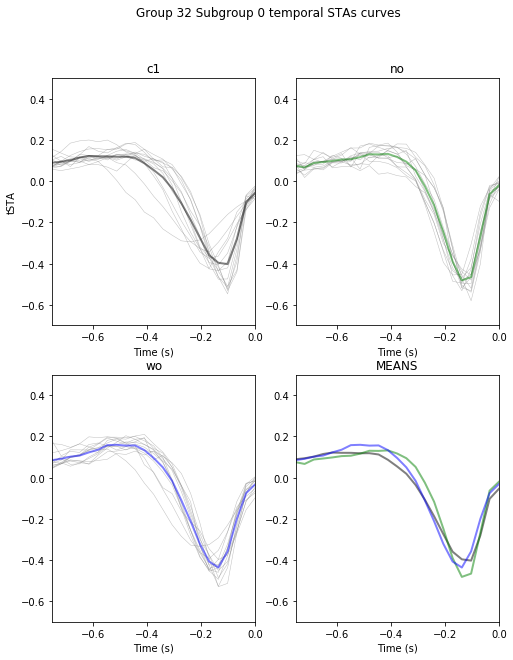

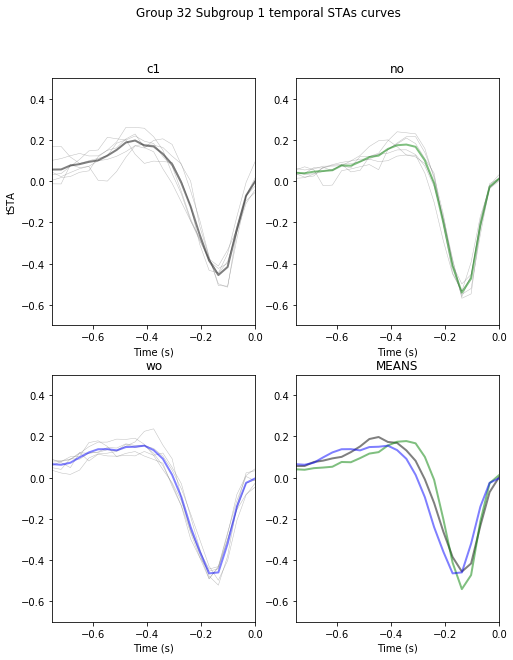

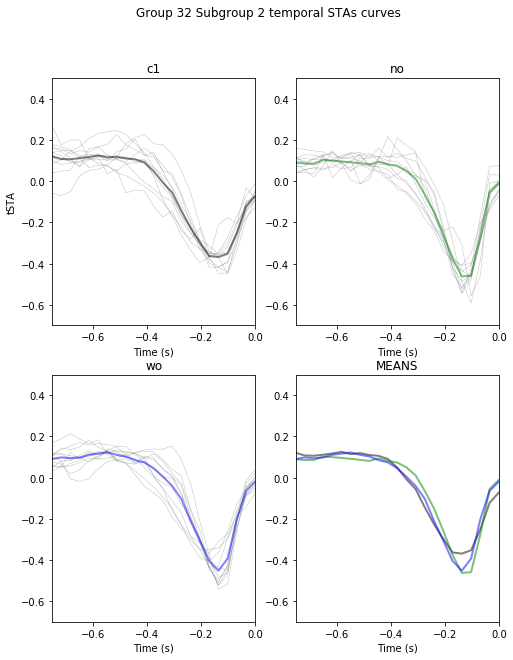

In [30]:
# Plot Curves data Subgroups
tsta = np.linspace(-40/30,0,40)
PDFsave= rootf+ '/OUTPUT_NO_MEA/STA_analysis/'


COLORS = ['k','g','b']
TITLES = ['c1','no','wo', 'MEANS']
for g in [0,1,2]:
    tstas= [Curvesc1[g],Curvesno[g],Curveswo[g]]
    fig =figure(figsize=(8,10))
    fig.suptitle('Group '+str(G+1)+' Subgroup '+str(g)+' temporal STAs curves')
    for i in [0,1,2]:
        ax= fig.add_subplot(2,2,1+i)
        ax.set_title(TITLES[i])
        C = tstas[i]
        ax.plot(tsta,np.array(C).T,color='gray',alpha=0.5,lw=0.5)
        ax.plot(tsta,np.mean(np.array(C),axis=0),color=COLORS[i],alpha=0.5,lw=2)


        ax.set_ylim([-0.7,0.5])
        ax.set_xlim([-0.75,0.])

        ax.set_xlabel('Time (s)')
        if i==0 or i==3: ax.set_ylabel('tSTA')

        ax= fig.add_subplot(2,2,4)
        ax.set_title(TITLES[3])
        ax.plot(tsta,np.mean(np.array(C),axis=0),color=COLORS[i],alpha=0.5,lw=2)
        ax.set_ylim([-0.7,0.5])
        ax.set_xlim([-0.75,0.])

        ax.set_xlabel('Time (s)')
    
    fsave = PDFsave + 'Group'+str(G+1)+'Subgroup'+str(g)+'_tSTAs_curves'
    
    fig.savefig(fsave+'.pdf',format='pdf')

# Plotting Ellipses data

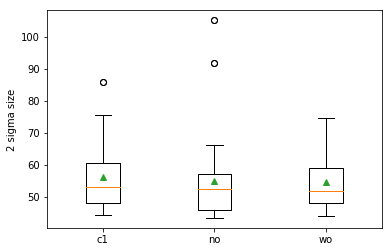

In [25]:
# Plot Ellipses data

PDFsave= rootf+ '/OUTPUT_NO_MEA/STA_analysis/'
fsave = PDFsave + 'Group'+str(G+1)+'_EllipseSize'

fig =figure(figsize=(6,4))
ax= fig.add_subplot(1,1,1)
ax.boxplot([esizec1*2,esizeno*2,esizewo*2],showmeans=True)

ax.set_ylabel('2 sigma size')
ax.set_xticks([1,2,3])
ax.set_xticklabels(['c1','no','wo'])
# ylim([30,80])

fig.savefig(fsave+'.pdf',format='pdf')

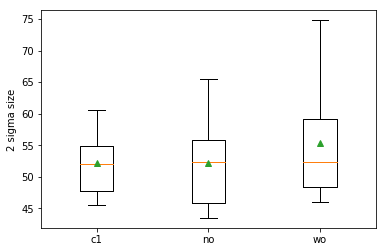

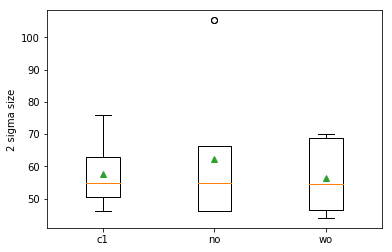

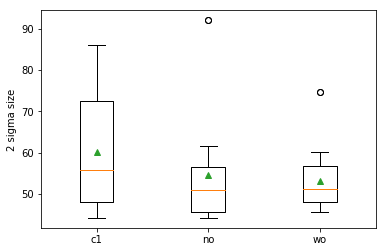

In [26]:
# Plot Ellipses data

PDFsave= rootf+ '/OUTPUT_NO_MEA/STA_analysis/'
for g in [0,1,2]:
    fsave = PDFsave + 'Group'+str(G+1)+'_Subgroup'+ str(g) +'_EllipseSize'

    fig =figure(figsize=(6,4))
    ax= fig.add_subplot(1,1,1)
    ax.boxplot([Esizec1[g]*2,Esizeno[g]*2,Esizewo[g]*2],showmeans=True)

    ax.set_ylabel('2 sigma size')
    ax.set_xticks([1,2,3])
    ax.set_xticklabels(['c1','no','wo'])
    # ylim([30,80])

    fig.savefig(fsave+'.pdf',format='pdf')

# Plotting width data

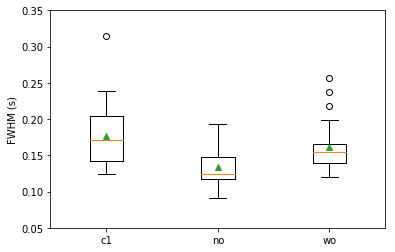

In [27]:
# Plot width data

ymin=0.05
ymax=0.35

PDFsave= rootf+ '/OUTPUT_NO_MEA/STA_analysis/'
fsave = PDFsave + 'Group'+str(G+1)+'_sta_width'

fig =figure(figsize=(6,4))
ax= fig.add_subplot(1,1,1)

wc1=np.array(wc1)[np.where(np.array(wc1)>0)[0]]
wno=np.array(wno)[np.where(np.array(wno)>0)[0]]
wwo=np.array(wwo)[np.where(np.array(wwo)>0)[0]]

ax.boxplot([wc1,wno,wwo],showmeans=True)
ax.set_ylim([ymin,ymax])

ax.set_ylabel('FWHM (s)')
ax.set_xticks([1,2,3])
ax.set_xticklabels(['c1','no','wo'])

fig.savefig(fsave+'.pdf',format='pdf')



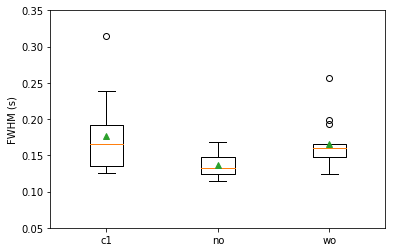

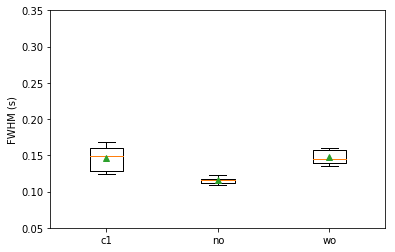

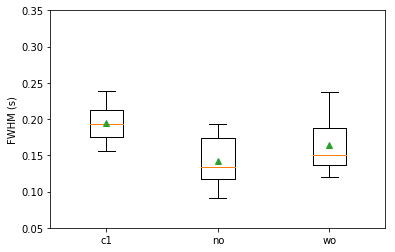

In [28]:
ymin=0.05
ymax=0.35

PDFsave= rootf+ '/OUTPUT_NO_MEA/STA_analysis/'
for i in [0,1,2]:
    fsave = PDFsave + 'Group'+str(G+1)+'_Subgroup'+ str(i) +'_sta_width'

    fig =figure(figsize=(6,4))
    ax= fig.add_subplot(1,1,1)
    
    Wc1[i]=np.array(Wc1[i])[np.where(np.array(Wc1[i])>0)[0]]
    Wno[i]=np.array(Wno[i])[np.where(np.array(Wno[i])>0)[0]]
    Wwo[i]=np.array(Wwo[i])[np.where(np.array(Wwo[i])>0)[0]]
    
    boxplot([Wc1[i],Wno[i],Wwo[i]],showmeans=True)

    ax.set_ylabel('FWHM (s)')
    ax.set_xticks([1,2,3])
    ax.set_xticklabels(['c1','no','wo'])
    ax.set_ylim([ymin,ymax])

    fig.savefig(fsave+'.pdf',format='pdf')